<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/Data_Science_Camp_Linear_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

### **Making Predictions**

We all make predictions every day. From predicting the weather to predicting the results of a football match, you make countless predictions every day based on the knowledge you currently have.

***Linear regression*** is a method for machines to make predictions. The machine tries to find the relationship between two variables in order to make predictions about one based on the other.

For instance, let's say you're training a computer to find the relationship between *height* and *shoe size*. After learning from lots of data showing many peoples' height and shoe size, the computer would find that—as you know—shoe size increases with height.

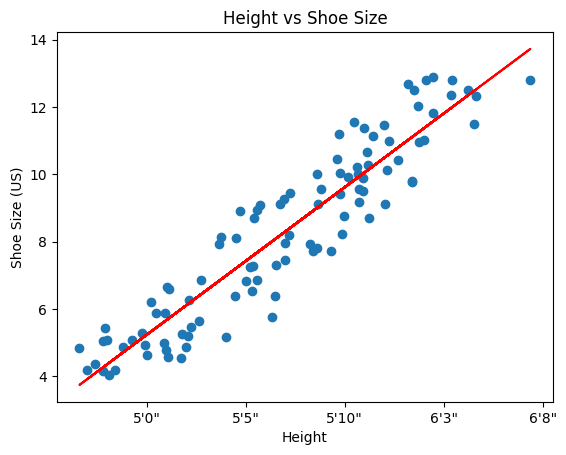

In [ ]:
#@title 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

# Function to convert inches to feet and inches
def format_func(value, tick_number):
    feet = int(value // 12)
    inches = int(value % 12)
    return f"{feet}'{inches}\""

# Set a seed for reproducibility
np.random.seed(0)

# Generate synthetic shoe sizes between 4 and 13 (inclusive)
shoe_sizes = np.random.uniform(low=4, high=13, size=100)

# Generate corresponding synthetic heights in inches (assuming an average height of 66 inches with some variation)
# The constant and coefficient values (50 and 2, in this case) are arbitrary and chosen to create a reasonable correlation.
heights = (50 + 2 * shoe_sizes + np.random.normal(loc=0, scale=2, size=100)).reshape(-1, 1)

# Plot the data
fig, ax = plt.subplots()
ax.scatter(heights, shoe_sizes)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
plt.title("Height vs Shoe Size")
plt.ylabel("Shoe Size (US)")
plt.xlabel("Height")

# Fit and predict with linear regression
model = LinearRegression()
model.fit(heights, shoe_sizes)
shoe_sizes_pred = model.predict(heights)

# Plot the regression line
ax.plot(heights, shoe_sizes_pred, color='red')

# Display the plot
plt.show()


### **How does a computer guess?**

It's easy for us to understand that shoe size increases with height, but how would a computer guess that?

The computer draws a **line**, hence the name *linear* regression. The line, or ***hypothesis***, that matches the data closest is known as the ***line of best fit***. In the example above, the red line represents the line of best fit, the computer's best guess at finding the relationship in the data.

As with any line, the computer's hypothesis can be described by the equation

$$y = mx + b$$

where $m$ is the slope of the line and $b$ is the y-intercept.

### **How does the computer know if a guess is bad?**

A computer can come up with as many different lines as it wants, but a good hypothesis is a line that matches the data as closely as possible.

Now, what does that mean? For the computer's hypothesis to closely "match" the data, **the hypothesis must *minimize* the average distance between the data points and the line.** 

Of course, it isn't possible to perfectly hit every data point with one line. However, you can minimize how *wrong* the hypothesis is on average, finding the "sweet spot" for the slope ($m$) and y-intercept ($b$) of the hypothesis.

### **Loss Function**

***Loss*** is another word for how wrong the hypothesis is. It represents the *inaccuracy* of the hypothesis (i.e. more loss = worse hypothesis), and is calculated through a ***loss function***. 

An example of a loss function is ***mean squared error (MSE)***:

$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

$L$ = Loss
<br>$n$ = # of data points
<br>$y_i$ = real y-value
<br>$\hat{y_i}$ = predicted y-value
<br></br>
Let's break this equation down.
<br></br>
$n$ represents the total number of data points—$(x,y)$ coordinates like the dots in the *Height vs. Shoe Size* graph.
<br>$i$ represents each individual data point from $1$ to $n$ (if $i=1$ we're looking at the first data point)
<br>$y_i$ is the *real* y-value of the $i^{th}$ data point. For example, in the dataset $[(1,2), (3,4)]$, $y_1=2$ and $y_2=4$.
<br>$\hat{y_i}$ (pronounced "y-hat") is the *predicted* y-value of the $i^{th}$ data point. It is the output of the computer's hypothesis function $\hat{y_i}=mx_i+b$ given some $x_i$.
<br></br>
1. For each data point $i$, the MSE equation finds the hypothesis' ***error*** $(y_i-\hat{y_i})$, the difference between the true y-value of the data point and the computer's predicted y-value. 
2. The error is then squared, ensuring that the loss is positive (concerned with *how much* error, not which direction) and that large errors hold more weight than small ones.
3. The loss, $L$, is the average of all the data points' squared errors, summing the squared error of all data points $i=1→n$ and dividing the sum by $n$. 

The errors for each data point are colored red in the graph below. Here you can see why squaring the error is important; if the errors weren't squared, the sum of the positive and negative errors would cancel out, making the error seem lower than it truly is.

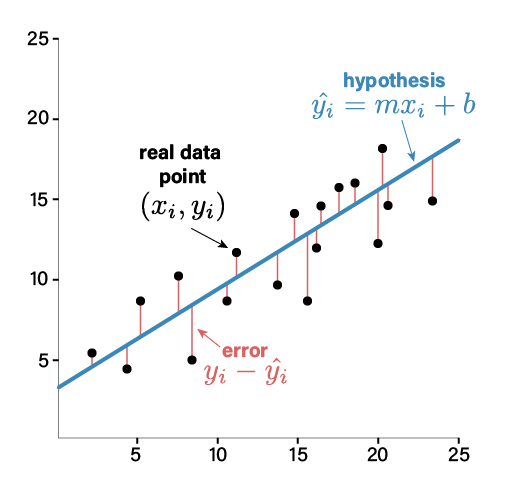

### **Activity - Loss By Hand**

Take a look at the graph below. The graph shows three different hypotheses and 5 data points.

Calculate the mean squared error for each hypothesis. Which hypothesis has the lowest loss?

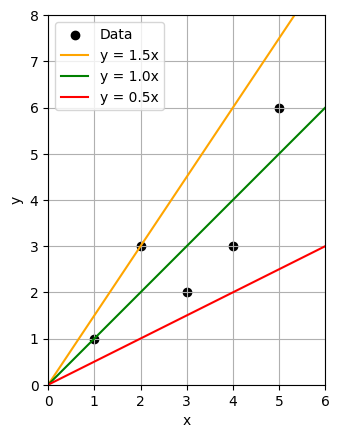

In [ ]:
#@title 
# Data
x_data = [1,2,3,4,5]
y_data = [1,3,2,3,6]

# Hypotheses
# Generate an array of 100 x-values from 0 to 10
x = np.linspace(0, 10, 100)
# Calculate the corresponding y-values
y1 = 1.5 * x
y2 = 1.0 * x
y3 = 0.5 * x

# Initialize plots
fig, ax = plt.subplots()

# Plot the data
ax.scatter(x_data, y_data, color='black', label='Data')

# Plot all three hypotheses
ax.plot(x, y1, color='orange', label='y = 1.5x')
ax.plot(x, y2, color='green', label='y = 1.0x')
ax.plot(x, y3, color='red', label='y = 0.5x')

# Format plot and show the grid
ax.set_aspect('equal', adjustable='box')
ax.grid()

# Set axis boundaries and labels
ax.set_xlim([0, 6])
ax.set_ylim([0, 8])
ax.set_xlabel('x')
ax.set_ylabel('y')

# Display the legend
ax.legend()

# Display the plot
plt.show()

### **StatQuest Video**

This video covers the basics of linear regression and touches on how you can minimize loss to find the line of best fit. Watch this video before moving on to the next activity.

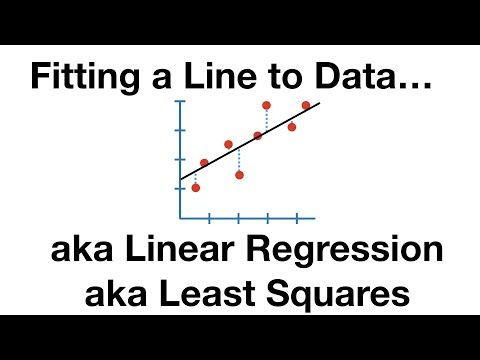

In [ ]:
#@title

from IPython.display import YouTubeVideo
YouTubeVideo('PaFPbb66DxQ')

### **Activity 1 - Minimizing Loss**

You are attempting to find the value of $m$ that minimizes the loss function $L=(m-3)^2+2$

1. Plot the function $L(m)$ vs $m$
2. Using the concepts from the StatQuest video, describe in words how you might find the minimum of the curve using an automated algorithm.
3. What value of $m$ should the algorithm start with? 

```{toggle}
SOLUTION
[](
1. Sketch $L(m)$ vs $m$
2. Let's start at an arbitrary point $m=6$. Compute the slope at $m=6$ to get $9$
3. TO GET TO A MIMUMUM THE RULE IS TO MOVE IN THE NEGATIVE DIRECTION OF THE SLOPE ONE STEP AT A TIME, EVALUATE SLOPE AND MOVE AGAIN, TILL SLOPE=0
4. So, you move to the left on the m-axis, let us say by 1 unit. So, we get to $m=5$ 
5. Compute the slope at $m=5$ to get $4$. So, you move now to $m=4$ 
6. Compute the slope at $m=4$ to get $1$. So, you move now to $m=3$ 
7. Compute the slope at $m=3$ to get $0$. Since the $slope=0$, you have reached the mimimum of the function $J(m)$
)
```

### **Adjusting the Hypothesis**

As shown in the StatQuest video, adjusting the hypothesis to fit the dataset is a matter of riding down the slope of the loss curve with respect to the parameters until loss is minimized. This process is known as ***gradient descent***.



### **Linear Regression With sklearn**

A popular machine learning library known as **sklearn** (scikit-learn) comes with a LinearRegression class that can make implementing linear regression much easier. Below is an example of Python code using the sklearn library to find the line of best fit for the same data in the "Loss By Hand" activity.
<br></br>
Only three lines of the code are relevant to linear regression. Let's look at them closer.

1. This line creates a new LinearRegression object named *model*. Now *model* can be used to perform LinearRegression functions.
    * ```model = LinearRegression()```

2. The model is then fit to the dataset (x_data, y_data). The **fit()** method minimizes the loss of the hypothesis repeatedly until a line of best fit is found.
    * ```model.fit(x_data, y_data)```

3. Now that the model has been fit to the dataset, we can use it to make its own predictions on y-values (y_pred) with the x-values of the dataset (x_data).
    * ```y_pred = model.predict(x_data)```

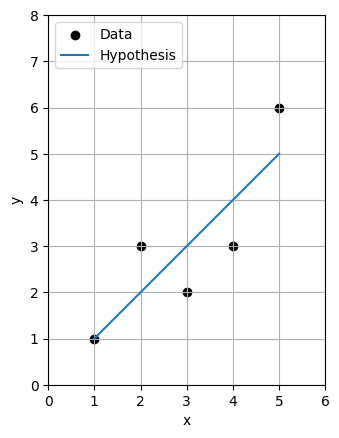

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
x_data = np.asarray([1,2,3,4,5]).reshape(-1,1) 
y_data = [1,3,2,3,6]

#-----------------------------------------------------------#

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data (find line of best fit)
model.fit(x_data, y_data)

# Get the model's y-value predictions based on the x-values
y_pred = model.predict(x_data)

#-----------------------------------------------------------#

# Plot the (x,y) data
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, color='black', label='Data')

# Plot the regression line
ax.plot(x_data, y_pred, color='tab:blue', label='Hypothesis')

# Adjust the plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0,6])
ax.set_ylim([0,8])
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.legend(loc='upper left')

# Display the plot
plt.show()


### **Linear Regression With PyTorch**

Another great machine learning library is PyTorch. In PyTorch, data takes the form of "tensors," which are essentially just arrays of numbers. Implementing linear regression with PyTorch is a bit more involved than sklearn, so let's break it apart and see what the code is actually doing.
<br></br>
1. First, we define the ```LinearModel``` class, similar to how we used the LinearRegression class in sklearn. ```LinearModel``` is defined as a subclass of ```torch.nn.Module```, the base class of all neural network modules in PyTorch. In its constructor ```def __init__(self)```, we specify that it inherits the constructor from its parent (super) class ```Module```. The constructor also defines the attribute ```self.linear``` as an instance of the PyTorch class ```torch.nn.Linear``` with 1 input and 1 output. The ```Linear``` class represents applying a linear transformation $y=mx+b$ on an input ($x$) to return an output ($y$).
    * ```
    class LinearModel(torch.nn.Module):
        def __init__(self):
            super(LinearModel, self).__init__()
            self.linear = torch.nn.Linear(1,1)
    ```
2. In all PyTorch models, the ```forward()``` method represents the forward pass of the model, i.e. the way the output is calculated from the input. In this case, that involves plugging $x_i$ into the model's hypothesis $\hat{y_i}=mx_i+b$ to obtain its prediction. As such, the forward method in ```LinearModel``` is defined as passing ```x``` to ```self.linear()```, obtaining the model's prediction ```y_pred```.
    * ```
        def forward(self, x):
            y_pred = self.linear(x)
            return y_pred
    ```
3. With the class now defined, a new ```LinearModel``` object is created named ```model```. This is what we will train for predictions.
    * ```
    model = LinearModel()
    ```
4. To train the model, we need a loss function and an optimizer to minimize it with gradient descent. Luckily, PyTorch has a built in mean squared error loss function ```torch.nn.MSELoss()``` and a stochastic (random) gradient descent optimizer ```torch.optim.SGD```. The optimizer's job is to adjust the model's parameters ($m$ and $b$ in the hypothesis $\hat{y_i}=mx_i+b$) so that loss is minimized. ```lr``` is just a number to control how quickly the optimizer performs gradient descent.
    * ```
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
    ```
5. Training the model takes many iterations, or ```epochs```, of adjustments. Here, we specify 500 epochs before training stops. In each epoch, the x-values of the dataset, ```x_data```, are fed into the ```model``` which returns the predictions, ```y_pred```. When ```model(x_data)``` is called, it calls the ```forward()``` function behind the scenes which is what ultimately returns ```y_pred```. The ```loss``` is then calculated with the loss function (MSE) that uses the predicted y-values ```y_pred``` and the real y-values ```y_data``` to find the average squared error of every data point. 
    * ```
    for epoch in range(500):
        y_pred = model(x_data)

        loss = loss_function(y_pred, y_data)
    ```
6. With the loss calculated, the optimizer can begin adjusting the model's parameters ($m$ and $b$) in the direction (gradient) that minimizes loss. Each epoch, before the new calculations, the optimizer must have its gradients reset to zero with ```optimizer.zero_grad()```. With the gradients reset, the new gradients can be calculated using ```loss.backward()```. Having now calculated the gradients, the model's parameters can be adjusted accordingly with ```optimizer.step()```.
    * ```
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    ```

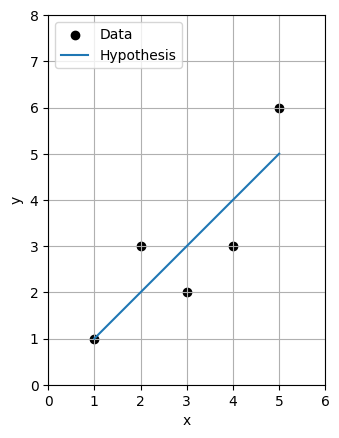

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Data
x_data = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0]).view(-1,1) 
y_data = torch.tensor([1.0, 3.0, 2.0, 3.0, 6.0]).view(-1,1) 

#-----------------------------------------------------------#

# Define a LinearRegression model
class LinearModel(torch.nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = torch.nn.Linear(1,1)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

model = LinearModel()

# Define loss function and optimizer
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# Fit the model
for epoch in range(500):
  y_pred = model(x_data)

  loss = loss_function(y_pred, y_data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#-----------------------------------------------------------#

# Convert to numpy arrays for plotting
x_data_np = x_data.numpy()
y_data_np = y_data.numpy()
y_pred_np = model(x_data).detach().numpy()

# Plot the (x,y) data
fig, ax = plt.subplots()
ax.scatter(x_data_np, y_data_np, color='black', label='Data')

# Plot the regression line
ax.plot(x_data_np, y_pred_np, color='tab:blue', label='Hypothesis')

# Adjust the plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0,6])
ax.set_ylim([0,8])
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.legend(loc='upper left')

# Display the plot
plt.show()

### **Activity 2 - YOU DESIGN A REGRESSION PROBLEM AND SOLVE IT YOURSELF**

You come up with a regression problem yourself, e.g., average height vs # of years,..... anything you like.

1. Make the dataset
2. Use the sklearn function to find the linear regression fit to the data